# Machine Learning
## Student: Vasquez Espinoza, Luis
### Final exam
___

## 1.  (10 pts.)  From this paper:

### (a)  (2 pts.)  Try to reproduce Figure 8 and make some comments from it

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import warnings

#warnings.simplefilter("ignore")

In [153]:
# Creating the data
TOTAL = 10000
np.random.seed(17)
x = np.random.uniform(0,1,(TOTAL, 20, ), )

In [154]:
df = pd.DataFrame(x, columns=["x_{}".format(i+1) for i in range(x.shape[1])])
df['target'] = 1
change_indices = df.sample(int(TOTAL*0.2), random_state=17).index
df.loc[change_indices, ['target']] = -1

print("Percent of +1 values: {}%".format( 100*len(df[df['target'] == 1]) / len(df) ))
print("Percent of -1 values: {}%".format( 100*len(df[df['target'] == -1]) / len(df) ))

Percent of +1 values: 80.0%
Percent of -1 values: 20.0%


In [155]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss

In [156]:
x = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target']

def adaboost_tree(x, y):
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=17),
                             n_estimators=1000,
                             learning_rate=1.1, 
                             random_state=17,
                             algorithm="SAMME.R")
    
    ada.fit(x, y)
    return ada

In [157]:
ada = adaboost_tree(x, y)

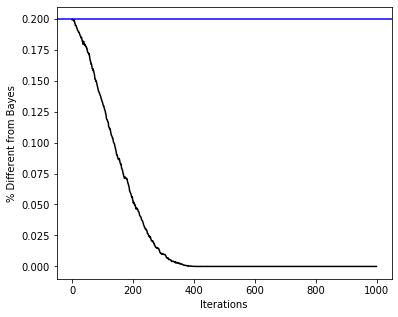

In [158]:
bayes_diff = []

for i, y_pred in enumerate(ada.staged_predict(x)):
    unique, counts = np.unique( np.array(y_pred*y), return_counts=True)
    classes_count = {1:0, -1:0}
    classes_count.update(dict(zip(unique, counts)))
    bayes_diff.append( classes_count[-1]/sum(classes_count.values()))

plt.figure(figsize=(6,5))
plt.plot(bayes_diff, c='#000000')
plt.xlabel('Iterations')
plt.ylabel('% Different from Bayes')

plt.axhline(0.2, c="b") # 20% for maximum diff. percentual error 

### 1.a. Comment:
The _AdaBoostClassifier_ actually wraps the decission tree in order to mange the unbalanced training dataset, converging to a low Bayes diff. percent after a while.  The first few iterations actually manage to lose the noise present in the data, and eventually manages to classify correctly the binary class.

### (c)  (2 pts.)  Try to reproduce Figure 10 and make some comments from it.

In [159]:
# Creating the data
TOTAL = 10000
np.random.seed(17)
x = np.random.uniform(0,1,(TOTAL, 20, ), )

df_test = pd.DataFrame(x, columns=["x_{}".format(i+1) for i in range(x.shape[1])])
df_test['target'] = 1
change_indices = df_test.sample(int(TOTAL*0.2), random_state=17).index
df_test.loc[change_indices, ['target']] = -1

x_test = df_test.loc[:, df_test.columns != 'target']
y_test = df_test.loc[:, 'target']

print("Percent of +1 values: {}%".format( 100*len(df_test[df_test['target'] == 1]) / len(df_test) ))
print("Percent of -1 values: {}%".format( 100*len(df_test[df_test['target'] == -1]) / len(df_test) ))

Percent of +1 values: 80.0%
Percent of -1 values: 20.0%


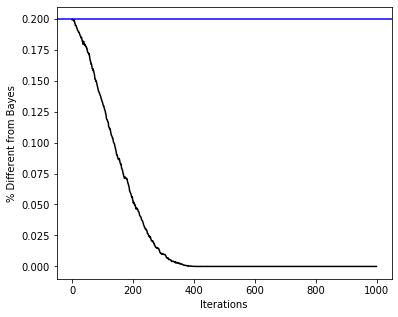

In [160]:
bayes_diff = []

for i, y_pred in enumerate(ada.staged_predict(x_test)):
    unique, counts = np.unique( np.array(y_pred*y_test), return_counts=True)
    classes_count = {1:0, -1:0}
    classes_count.update(dict(zip(unique, counts)))
    bayes_diff.append( classes_count[-1]/sum(classes_count.values()))

plt.figure(figsize=(6,5))
plt.plot(bayes_diff, c='#000000')
plt.xlabel('Iterations')
plt.ylabel('% Different from Bayes')

plt.axhline(0.2, c="b") # 20% for maximum diff. percentual error 

### 1.c. Comment:
We actually see a similar performance on a testing dataset, this being because of the fixed random state on '17' over every data generating call and modeling execution. The model still predicts accurately over the testing samples, but no further info is saveable from this experiment.

___
___
___
## 2.  (5 pts.)  From this paper:

### (a)  (2 pts.)  Try to reproduce the first row from the three ones of Table 1, i.e.,OriginalModel row.

In [161]:
# Needed libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [162]:
# Loading data
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = x / 255.

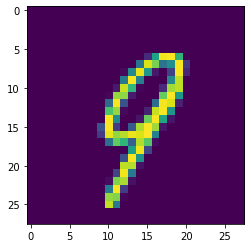

In [163]:
# Number example
plt.imshow(x[22].reshape(28,28))

In [164]:
# Splitting data in training (60k) and testing (10k)
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [165]:
total_epochs = 6
batch_size = 100
l_rate = 0.005
scores_test = []

mlp = MLPClassifier(hidden_layer_sizes=(50,), verbose=0, random_state=17, learning_rate_init=l_rate)

for epoch in range(total_epochs):
    print("Epoch:{}".format(epoch), end='')

    cont = 0
    while True:
        #if cont%10 == 0: print(cont*batch_size,":", (cont+1)*batch_size)
        mlp.partial_fit(x_train[cont*batch_size:(cont+1)*batch_size],
                        y_train[cont*batch_size:(cont+1)*batch_size],
                        classes=np.unique(y))
        cont += 1
        
        scores_test.append(mlp.score(x_test, y_test))
        
        if (cont+1)*batch_size >= x_train.shape[0]:
            break
            
    print(" -- DONE!")

Epoch:0 -- DONE!
Epoch:1 -- DONE!
Epoch:2 -- DONE!
Epoch:3 -- DONE!
Epoch:4 -- DONE!
Epoch:5 -- DONE!


In [166]:
from IPython.core.display import display, HTML

display(HTML("""
<table style="width:60%">
  <tr>
    <th>batch_size</th>
    <th>learning_rate</th>
    <th>number_of_epochs</th>
    <th>Model</th>
    <th>accuracy</th>
  </tr>
  <tr>
    <th>{}</th>
    <th>{}</th>
    <th>{}</th>
    <th>{}</th>
    <th>{}</th>
  </tr>
</table>
""".format(mlp.batch_size, mlp.alpha, mlp.n_iter_no_change, "original" ,mlp.score(x_test, y_test))))

batch_size,learning_rate,number_of_epochs,Model,accuracy
auto,0.0001,10,original,0.9661


### (b)  (2 pts.)  Try to reproduce Figure 5

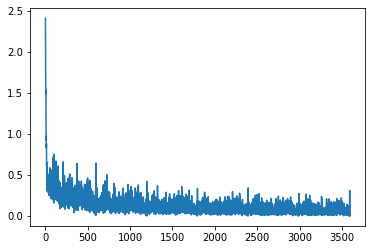

In [167]:
plt.plot(mlp.loss_curve_)

### (c)  (1 pt.)  Make some comments from your findings.

As the above plot shows, the loss curve improves the evaluation of the neural model over time, eventho the loss values are evaluated with test data. So not only the model actually learns from the training process, but also develops robustness and generalization over any data alike.